<a href="https://colab.research.google.com/github/ambuj501/Wind-Energy-Scenario-Generation-Using-ARIMA-Model/blob/master/Wind_Forecasting_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('train.csv')
df.shape

(18757, 8)

In [ ]:
df.head()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009070100,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009070101,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009070102,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009070103,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009070104,0.045,0.032,0.079,0.039,0.010,0.000,0.000


In [ ]:
data = df['wp1']
data.head()

0    0.045
1    0.085
2    0.020
3    0.060
4    0.045
Name: wp1, dtype: float64

In [ ]:
arr = np.array(data)

Convert the hourly data into dailty data by taking avg of 24 hours values

In [ ]:
li = list()
sume = 0
for i in range(len(arr)):
  sume = sume+arr[i]
  if(i%24==0):
    li.append(sume/24)
    sume = 0

len(li)

782

In [ ]:
data =  np.array(li)
data_df = pd.DataFrame(data)
data_df.head()

,0
0,0.001875
1,0.015000
2,0.021292
3,0.191792
4,0.329417


In [ ]:
data_df.describe()

,0
count,782.000000
mean,0.252081
std,0.194147
min,0.000000
25%,0.098188
50%,0.200667
75%,0.378844
max,0.918042


In [ ]:
train,test = data[:-82],data[-82:]

In [ ]:
print('Train Data Shape : ' + str(train.shape))
print('Test Data Shape :  ' + str(test.shape))

Train Data Shape : (700,)
Test Data Shape :  (82,)


In [ ]:
test_df = pd.DataFrame(test)
train_df = pd.DataFrame(train)

In [ ]:
print(test_df.describe())
print(train_df.describe())

               0
count  82.000000
mean    0.336523
std     0.212597
min     0.002083
25%     0.151740
50%     0.287896
75%     0.491990
max     0.833417
                0
count  700.000000
mean     0.242189
std      0.189586
min      0.000000
25%      0.091948
50%      0.191458
75%      0.361125
max      0.918042


Check the Trends, seasonality and Residual

<Figure size 432x288 with 0 Axes>

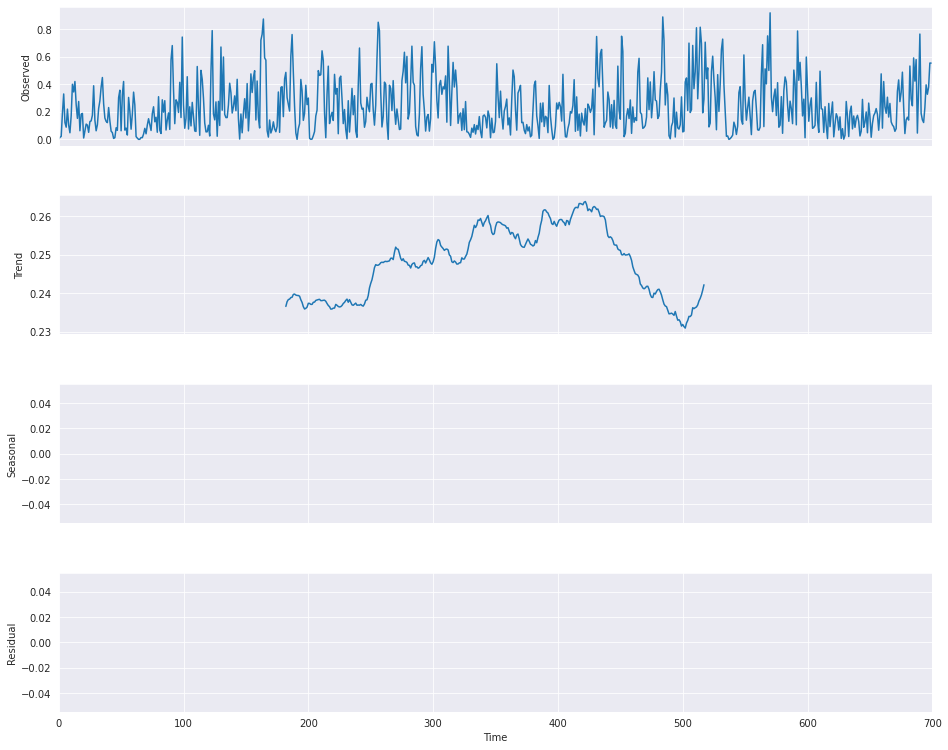

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

plot the ACF and Pacf to know about P and Q value

* Statistical correlation summarizes the strength of the relationship between two variables

* ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot


* ACF Determines the coefficient of MA model (p)

* PACF is a partial auto-correlation function which is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed .Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals


* PACF determines the coefficients of AR model (q)



 


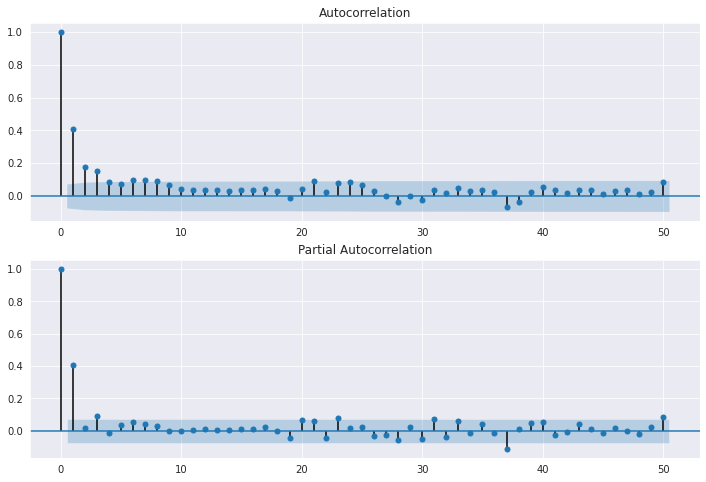

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df[0], lags=50, ax=ax1) 
# 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df[0], lags=50, ax=ax2)

**Checking stationarity**
* By seeing plot
* Summary Statistics (mean and variance)
* Statistical Tests


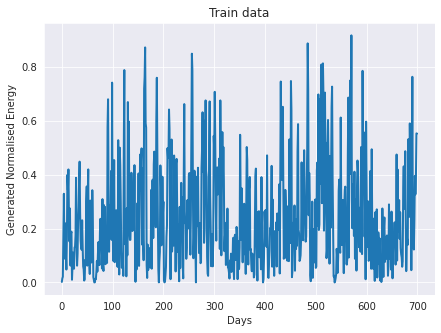

In [ ]:
#By Seeing Plot
plt.figure(figsize = (7,5))
plt.plot(train,linewidth = 2)
plt.title("Train data")
plt.xlabel("Days")
plt.ylabel("Generated Normalised Energy")
plt.show()

In [ ]:
# Summarry Statistics
split = round(len(data) / 2)
X1, X2 = data[0:split], data[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.232858, mean2=0.271304
variance1=0.033931, variance2=0.040620


### Augmented Dickey-Fuller test
* it determines how strongly a time series is defined by a trend

* p-value below a threshold (such as 5% or 1%) suggest 
stationary, otherwise a p-value above the threshold suggests non-stationary

In [ ]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.393525
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


#Implement Arima Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
(p, d, q) = (6, 0, 6)
model = ARIMA(train, order=(p,d,q)) 

model = model.fit(disp=0)
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  700
Model:                     ARMA(6, 6)   Log Likelihood                 243.359
Method:                       css-mle   S.D. of innovations              0.170
Date:                Thu, 25 Jun 2020   AIC                           -458.718
Time:                        11:28:38   BIC                           -395.002
Sample:                             0   HQIC                          -434.088
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2424      0.017     14.512      0.000       0.210       0.275
ar.L1.y       -0.1529      0.248     -0.617      0.538      -0.639       0.333
ar.L2.y       -0.1090      0.124     -0.876      0.3

#Forecast with ARIMA Model

In [ ]:
forecast = model.forecast(steps=82)[0] 

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)


Test MSE: 0.050


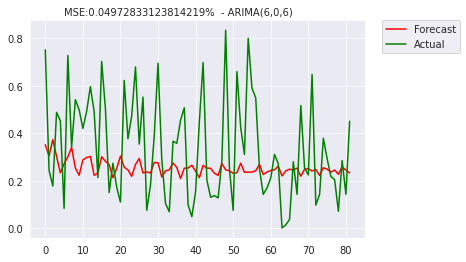

In [ ]:
plt.plot(forecast,c='r', label='Forecast')
plt.plot(test,c = 'g', label='Actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
s = 'MSE:' + str(error) + '% ' + ' - ARIMA('+str(p)+','+str(d)+','+str(q)+')'
plt.text(5,0.9,s)
plt.show()

#N-Day ahead Forecast

In [ ]:
n=7
p = 6
d = 0
q = 6
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(steps=n)[0] 
global_for = []
for i in range(82):
  global_for.append(forecast[i%n])  
  if(i%n==0):
    train = data[:len(train)+n]
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=n)[0] 

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

In [ ]:
global_for = np.array(global_for)
from sklearn.metrics import mean_squared_error, r2_score
error = mean_squared_error(test, global_for)
#error = (np.mean(np.abs((test-global_for)/test))*100) 
var = r2_score(test, global_for)
print('Test MSE: %.3f ' % error)
print('Test Variance : %.3f ' % var)

Test MSE: 0.044 
Test Variance : 0.010 


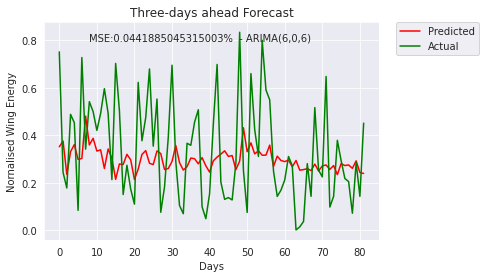

In [ ]:
plt.plot(global_for,c='r', label='Predicted')
plt.plot(test,c = 'g', label='Actual')
plt.title("Three-days ahead Forecast")
plt.xlabel("Days")
plt.ylabel("Nornalised Wing Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
s = 'MSE:' + str(error) + '% ' + ' - ARIMA('+str(p)+','+str(d)+','+str(q)+')'
plt.text(8,0.8,s)
plt.show()